<a href="https://colab.research.google.com/github/MaCoZu/RL-course-DSR/blob/main/your_1st_agents/learning_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


In [ ]:
!pip install tensorboard

In [ ]:
!pip install gymnasium
!pip install -U "ray[air]"
!pip install lz4

In [28]:
# 0 - Choose an alogrithm from ray.rllib.algorithms, e.g. ray.rllib.algorithms.xxx as
from ray.rllib.algorithms.dqn import DQNConfig

# 1 - Configure the xxx algorithm
# 1.1 - Convert the config to a dict by config.to_dict()
config = DQNConfig()

# 1.2 - Examine the config and modify it if needed, e.g. change the "num_gpus" to 0,
# and the learning_rate to 0.001, the environment with .environment(env="CartPole-v1"), the the framework

# 1.2 - Examine the config and modify it if needed, e.g. change the "learnign rate" to 0.0001,
config_as_dict = config.to_dict()

# 2 - Create an agent with .build, train it, and examine the training reports report = agent.train()
agent = DQNConfig().environment(env="CartPole-v1").framework("tf").build()

# 3 - Train the agent,
reports = agent.train()
print(reports)

# 4 - Run a loop for nr_trainings = 50 times agent.train()
nr_trainings = 5
for _ in range(nr_trainings):
    history = agent.train()
    print(_, "episode reward mean: ", history["episode_reward_mean"])

/usr/local/lib/python3.10/dist-packages/ray/rllib/algorithms/algorithm.py:484: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return UnifiedLogger(config, logdir, loggers=None)
/usr/local/lib/python3.10/dist-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
The `JsonLogger interface is deprecated in favor of the `ray.tune.json.JsonLoggerCallback` interface and will be removed in Ray 2.7.
  self._loggers.append(cls(self.config, self.logdir, self.trial))
/usr/local/lib/python3.10/dist-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppre

{'custom_metrics': {}, 'episode_media': {}, 'info': {'learner': {}, 'num_env_steps_sampled': 1000, 'num_env_steps_trained': 0, 'num_agent_steps_sampled': 1000, 'num_agent_steps_trained': 0}, 'sampler_results': {'episode_reward_max': 42.0, 'episode_reward_min': 10.0, 'episode_reward_mean': 18.826923076923077, 'episode_len_mean': 18.826923076923077, 'episode_media': {}, 'episodes_this_iter': 52, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [18.0, 18.0, 11.0, 13.0, 13.0, 14.0, 12.0, 29.0, 28.0, 10.0, 21.0, 15.0, 13.0, 17.0, 12.0, 14.0, 28.0, 18.0, 13.0, 10.0, 33.0, 29.0, 38.0, 18.0, 16.0, 12.0, 42.0, 10.0, 14.0, 11.0, 25.0, 27.0, 33.0, 11.0, 23.0, 15.0, 17.0, 19.0, 22.0, 20.0, 18.0, 18.0, 13.0, 29.0, 23.0, 25.0, 14.0, 13.0, 16.0, 12.0, 21.0, 15.0], 'episode_lengths': [18, 18, 11, 13, 13, 14, 12, 29, 28, 10, 21, 15, 13, 17, 12, 14, 28, 18, 13, 10, 33, 29, 38, 18, 16, 12, 42, 10, 14, 11, 25, 27, 33, 11, 23

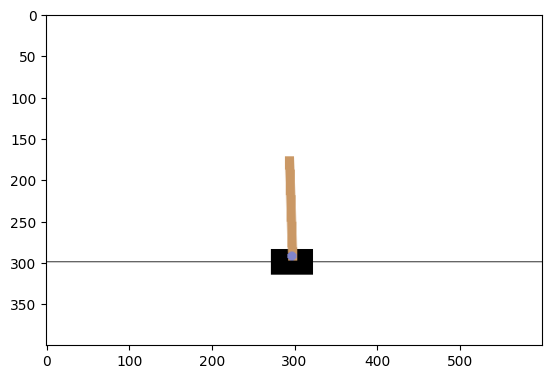

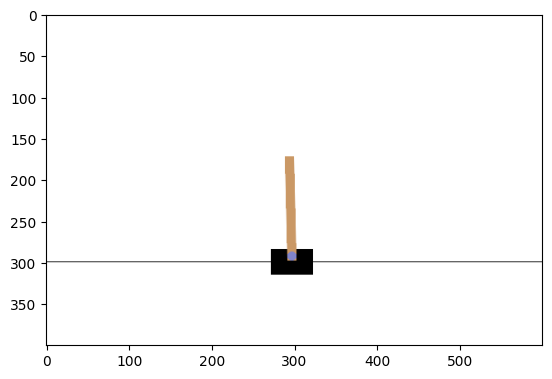

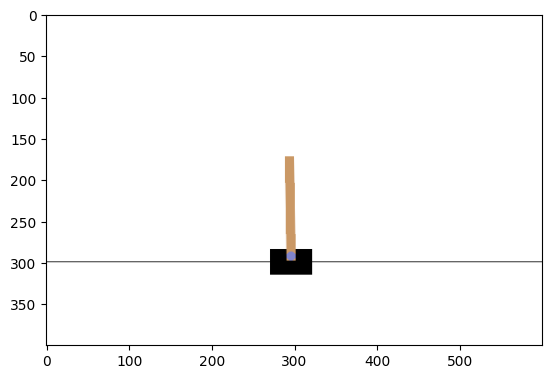

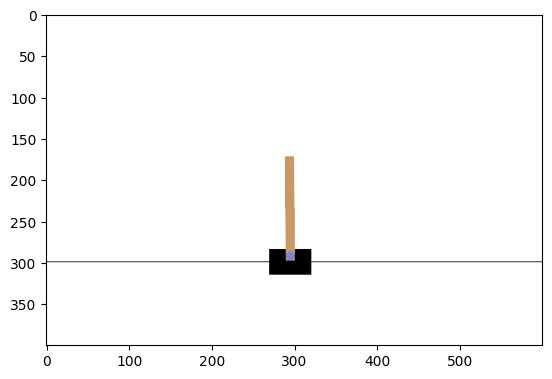

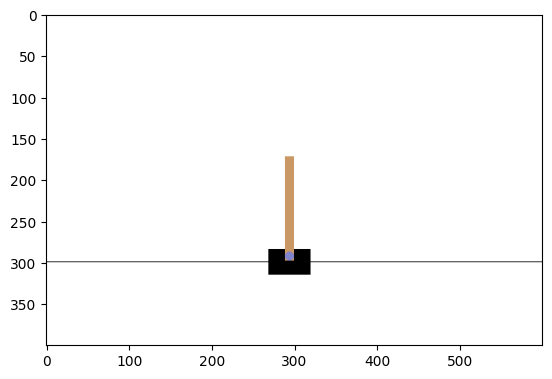

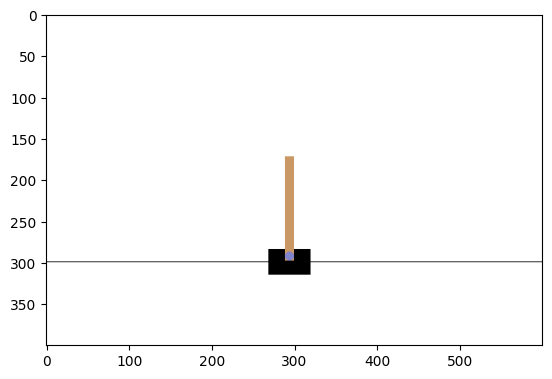

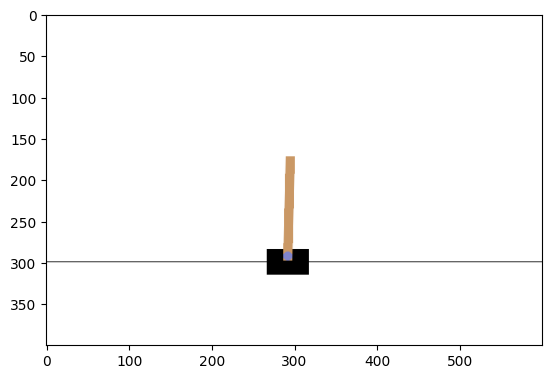

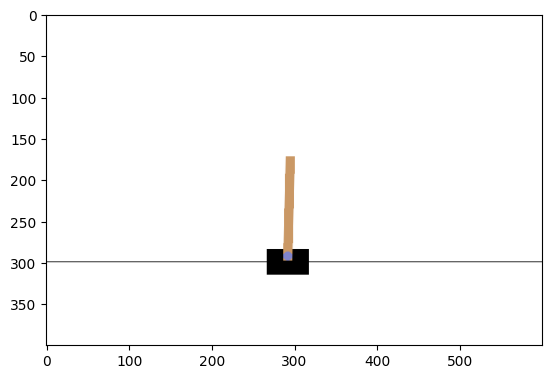

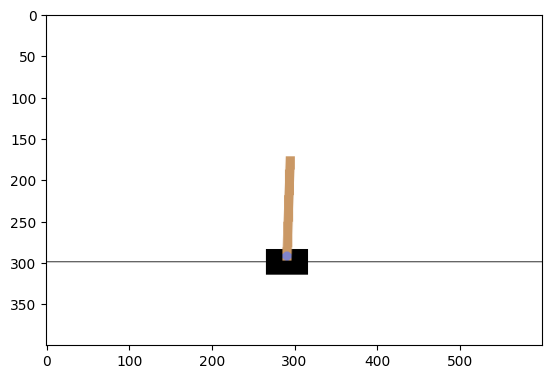

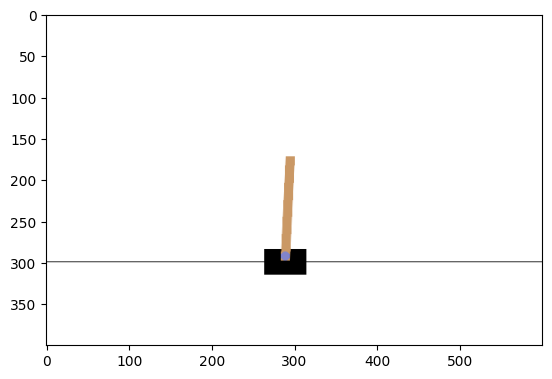

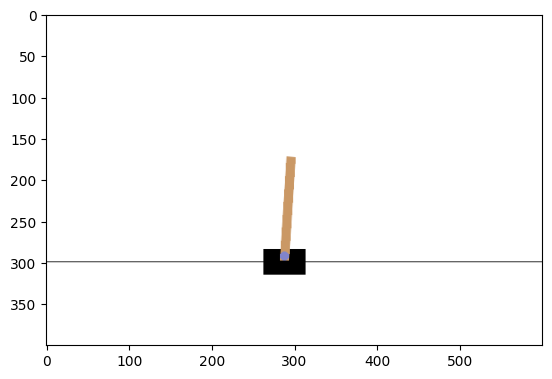

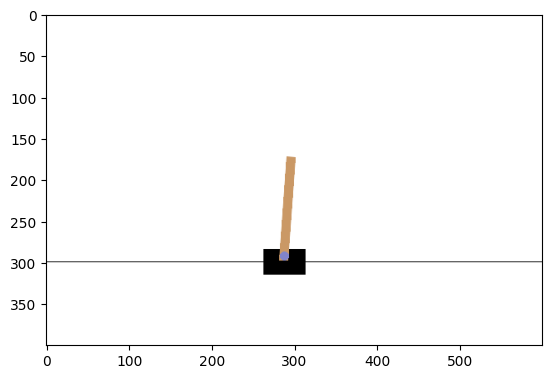

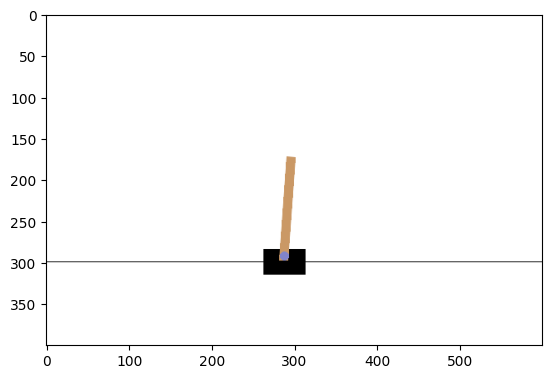

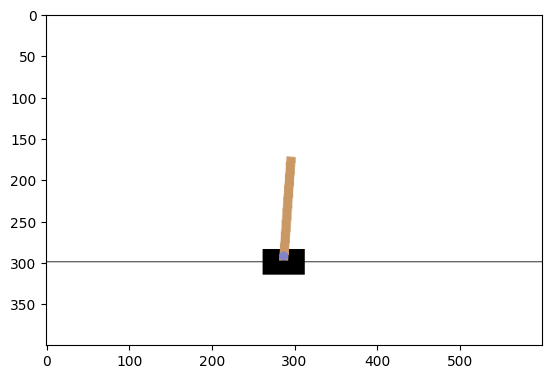

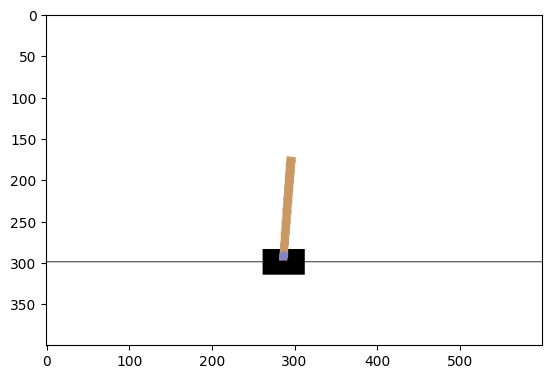

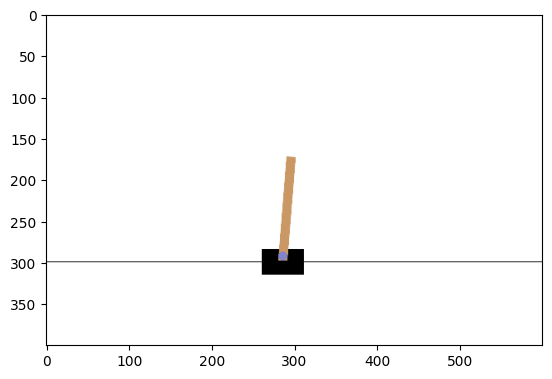

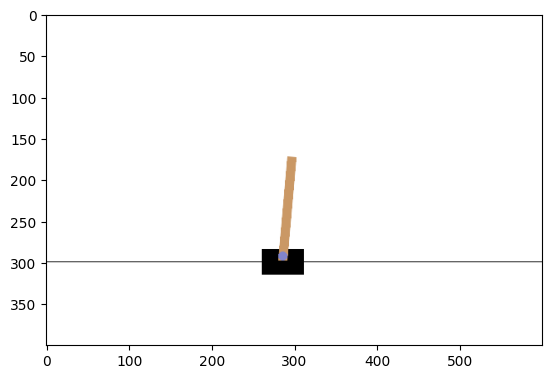

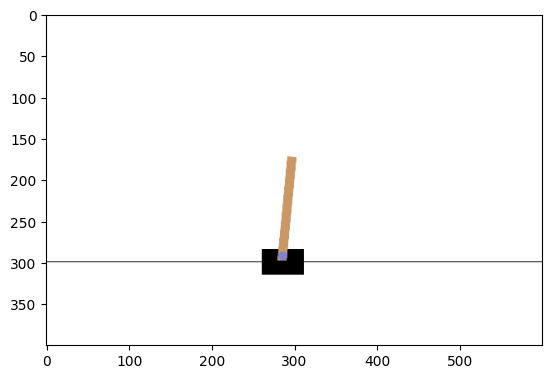

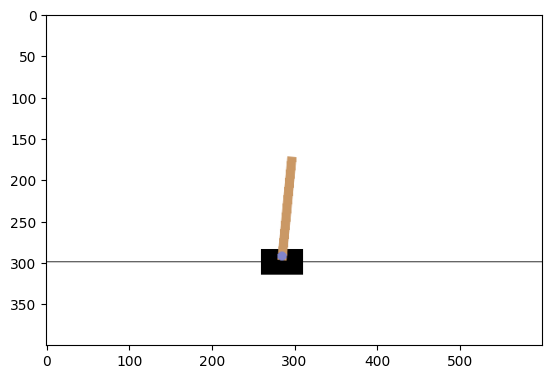

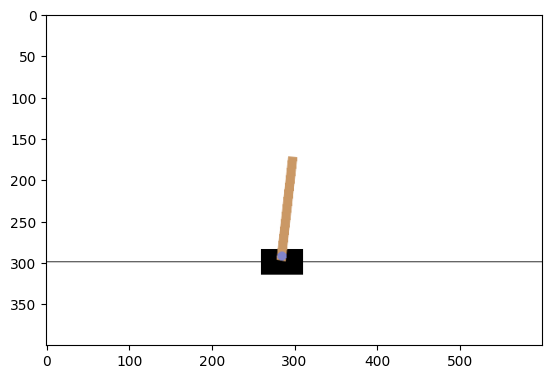

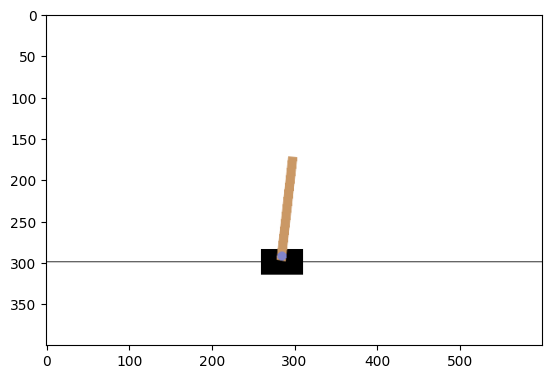

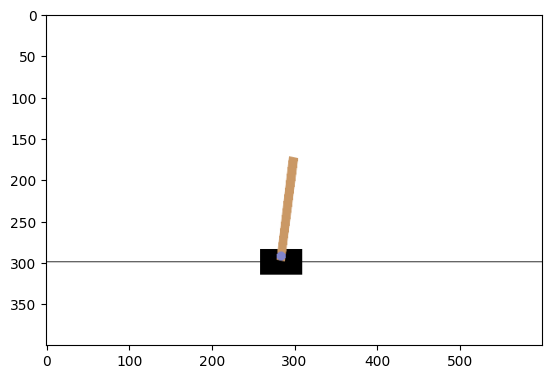

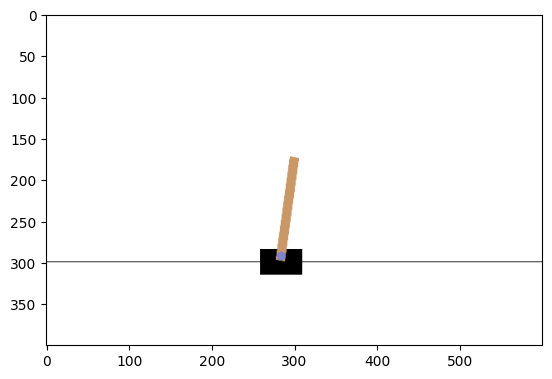

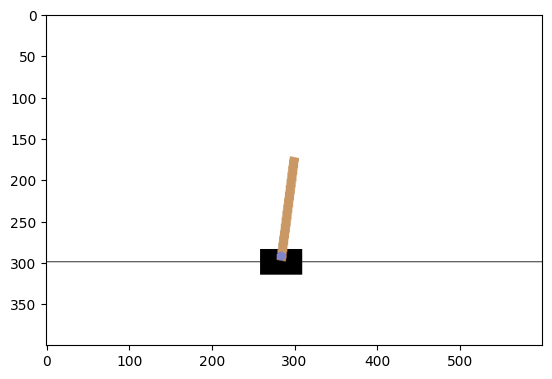

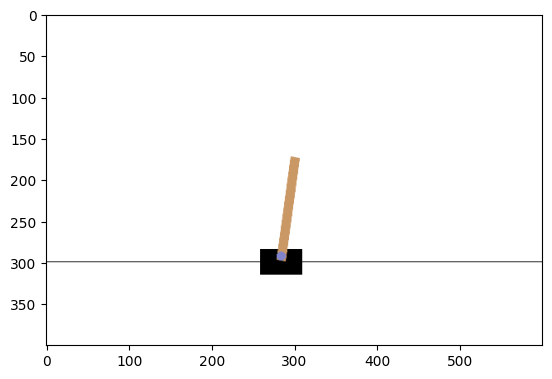

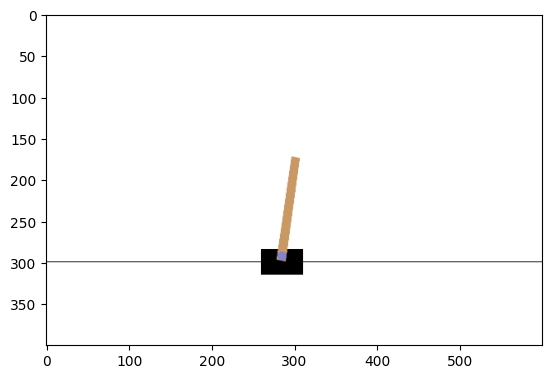

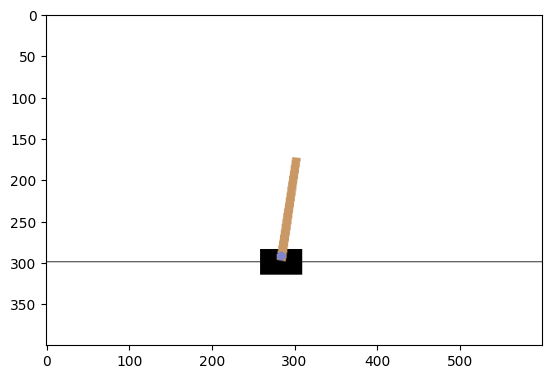

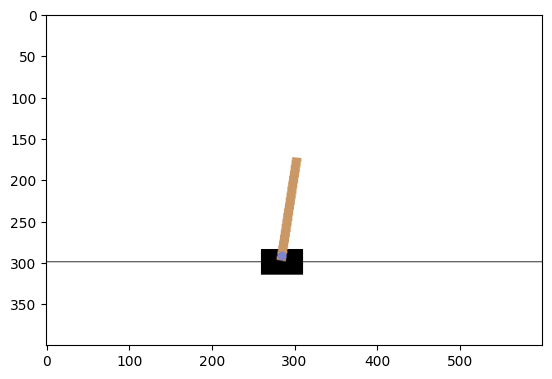

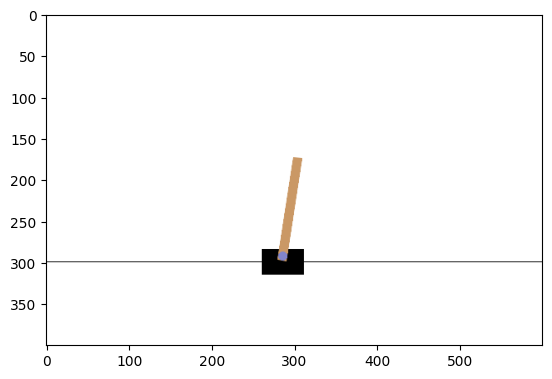

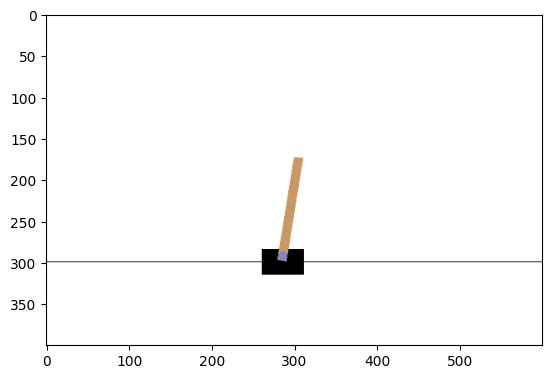

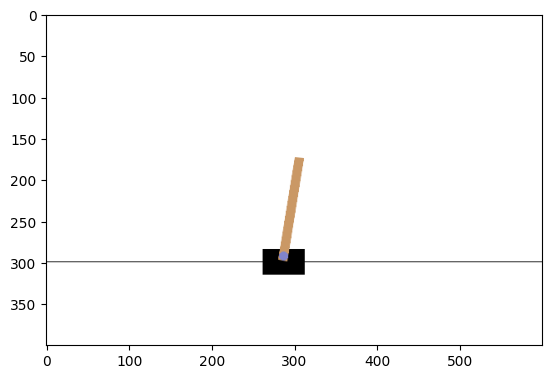

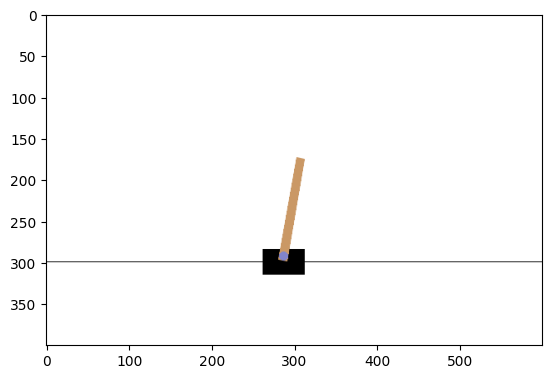

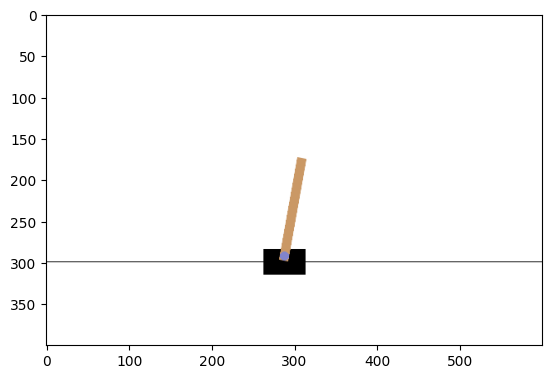

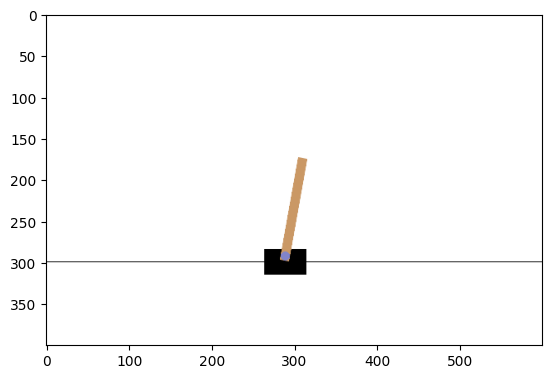

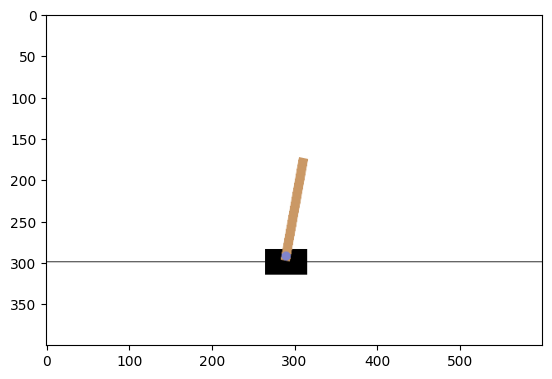

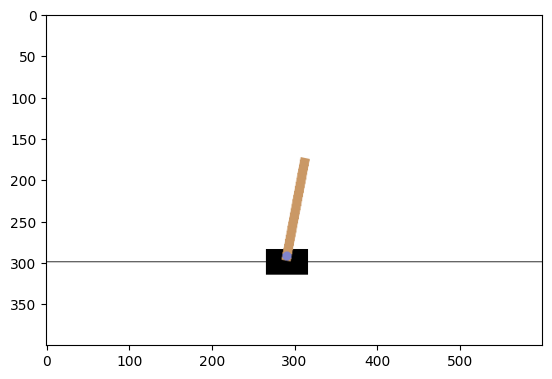

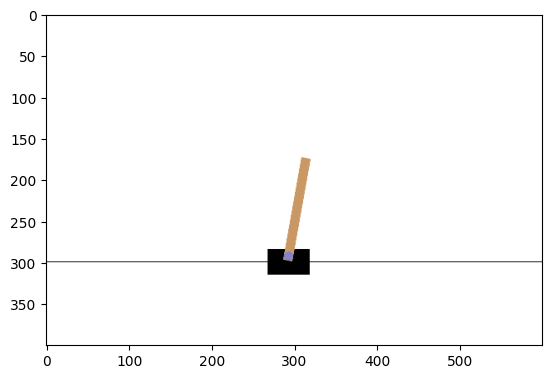

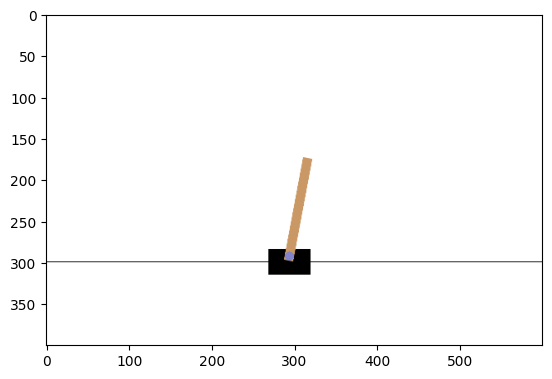

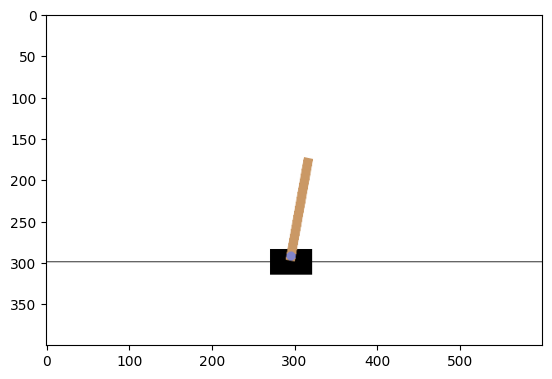

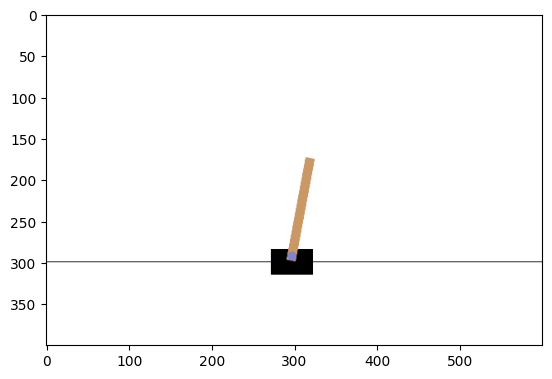

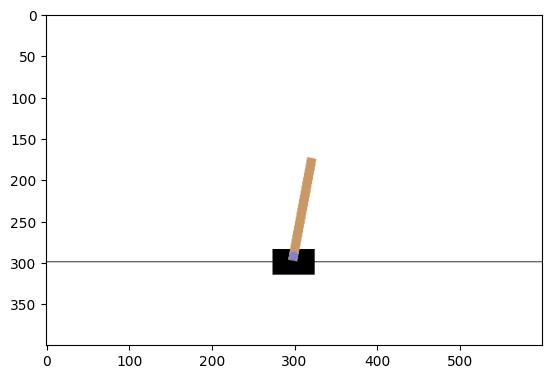

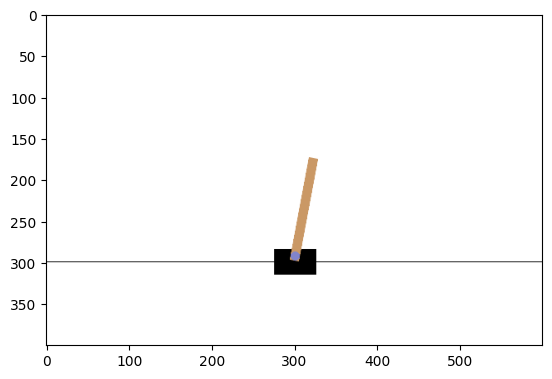

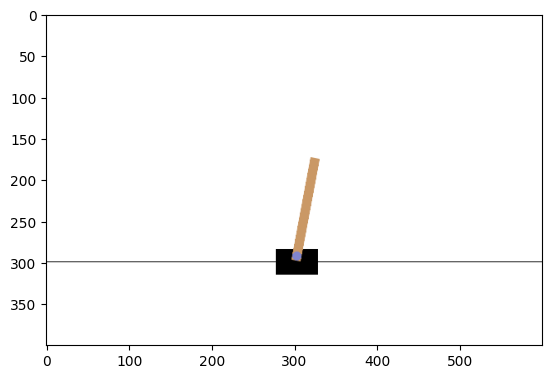

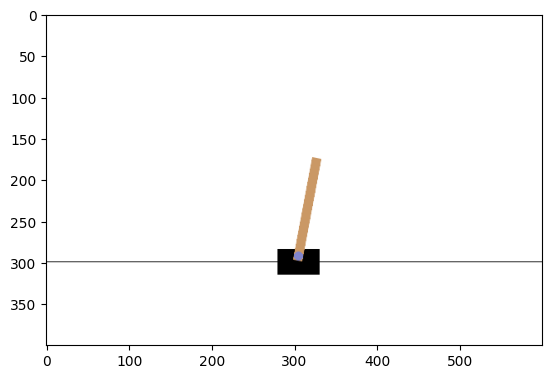

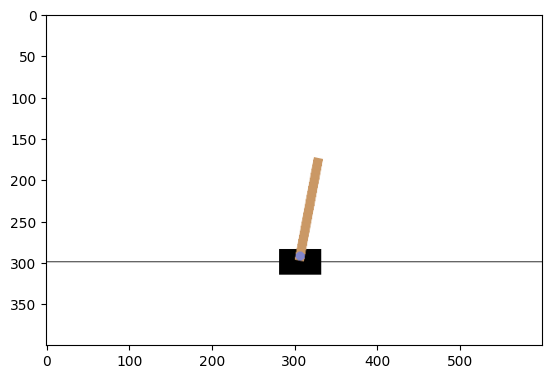

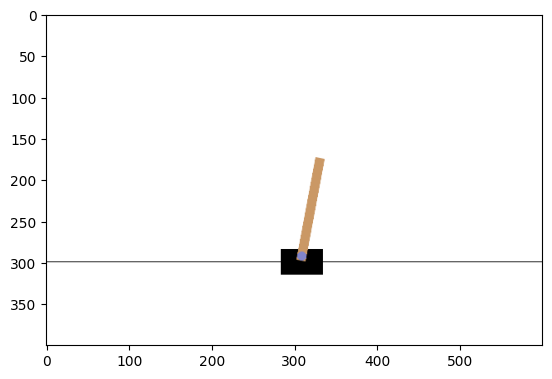

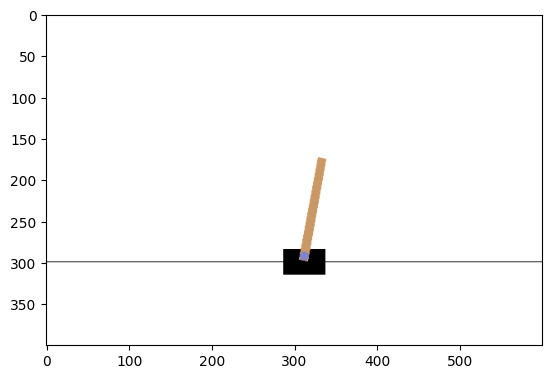

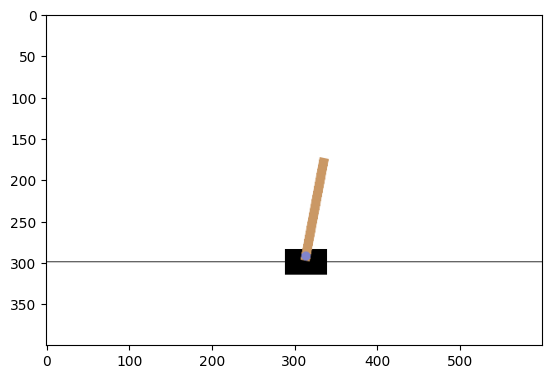

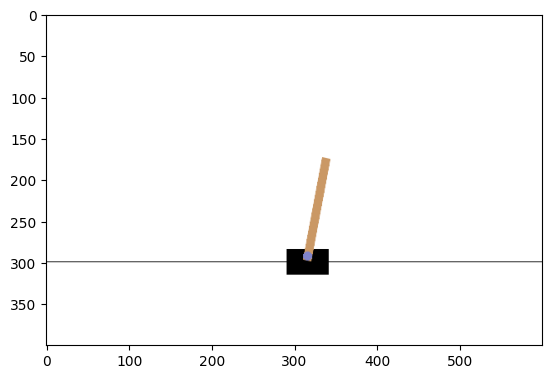

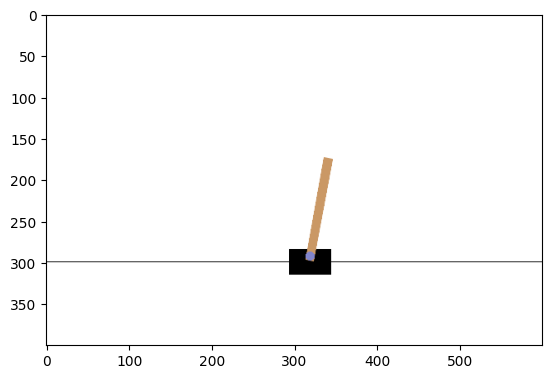

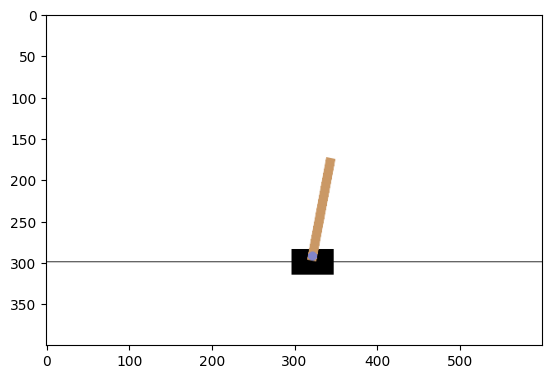

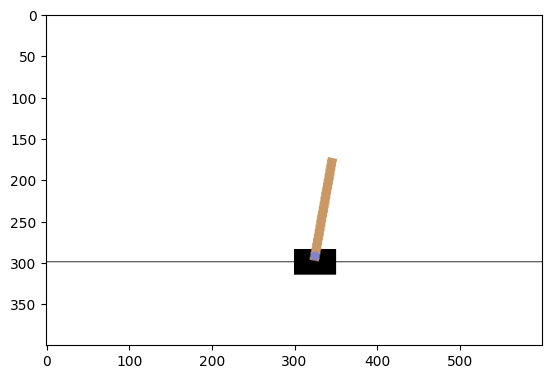

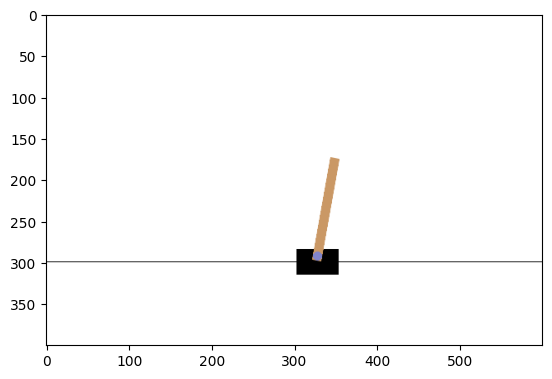

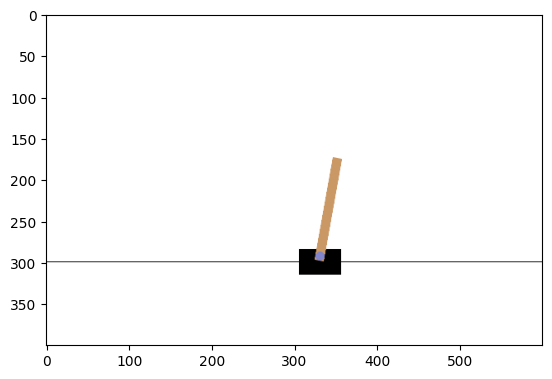

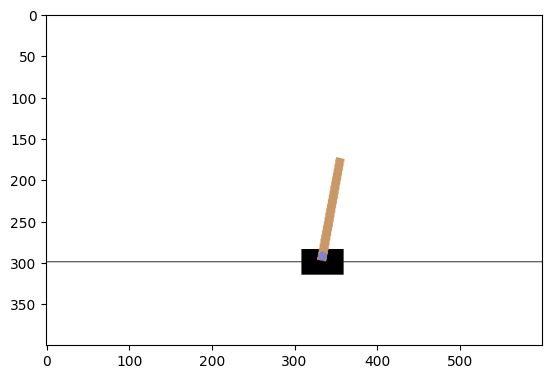

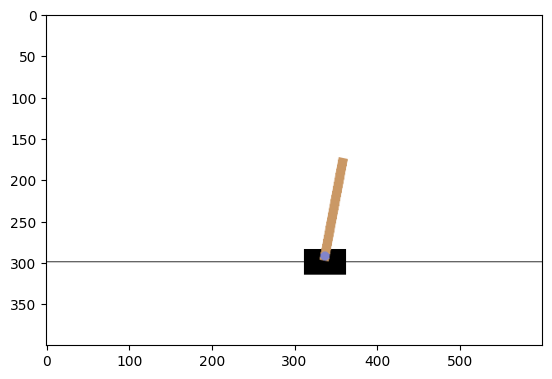

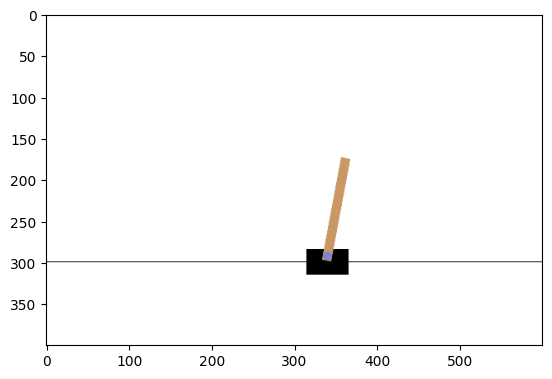

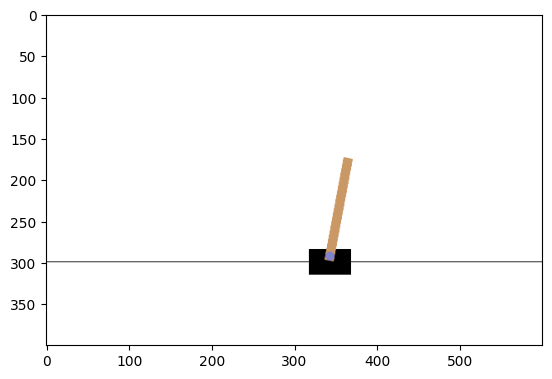

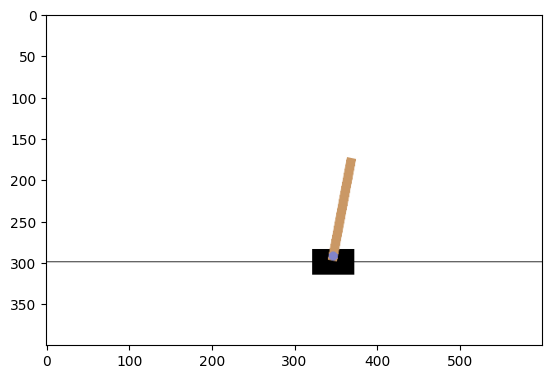

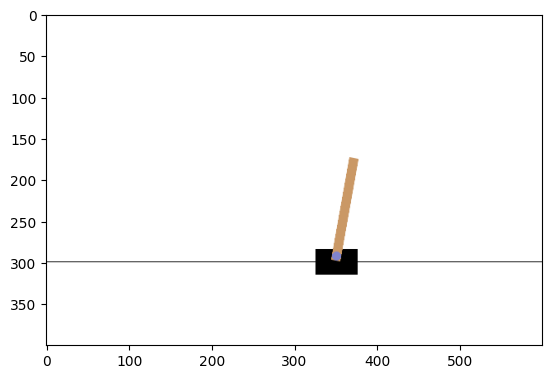

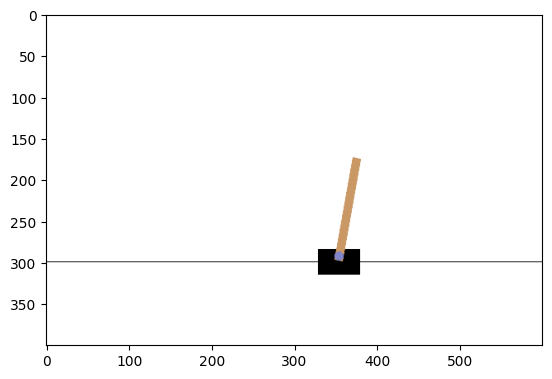

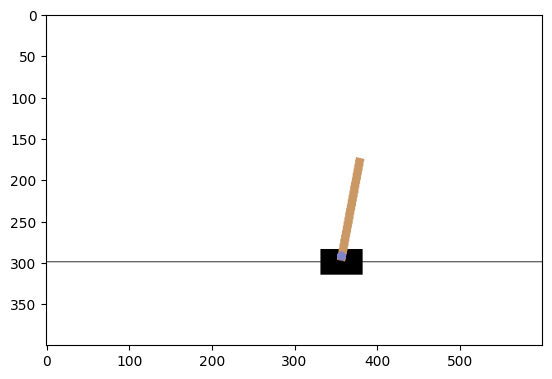

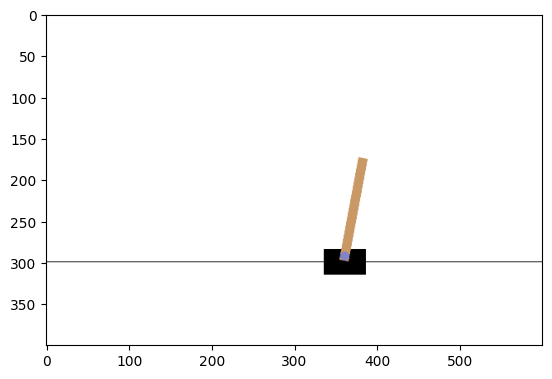

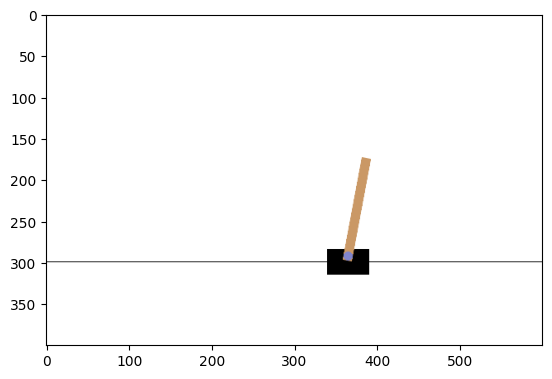

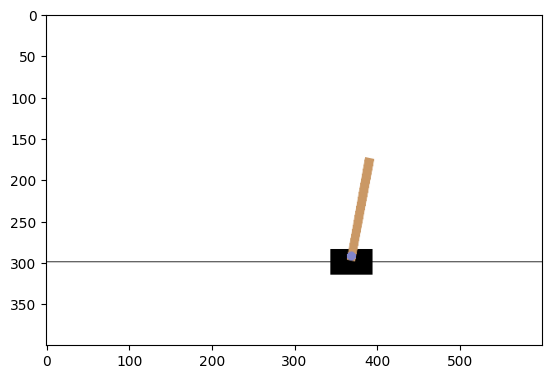

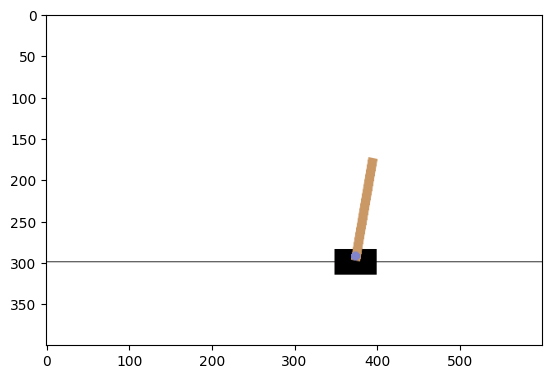

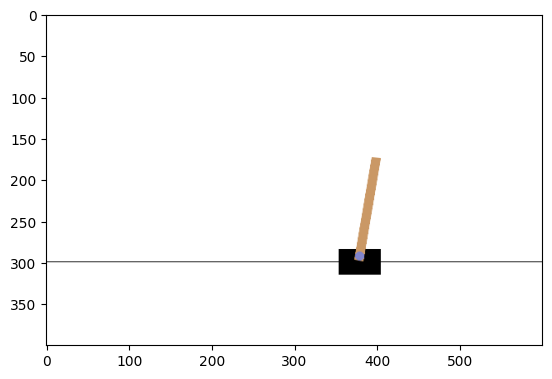

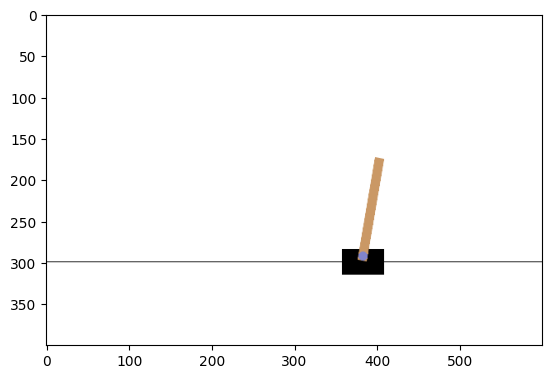

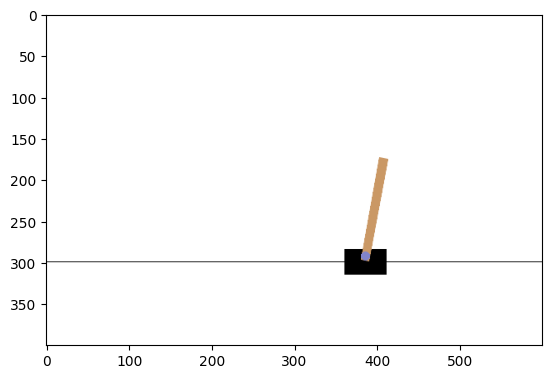

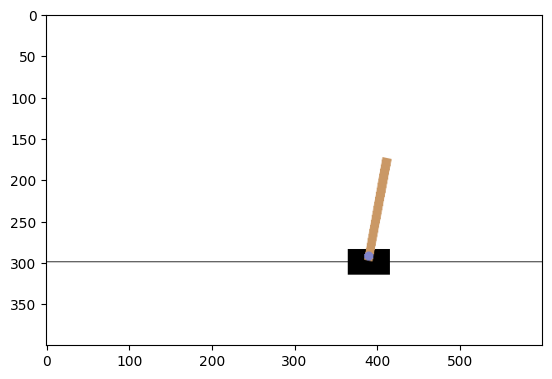

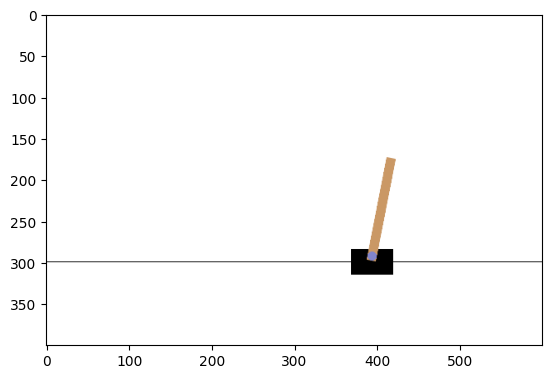

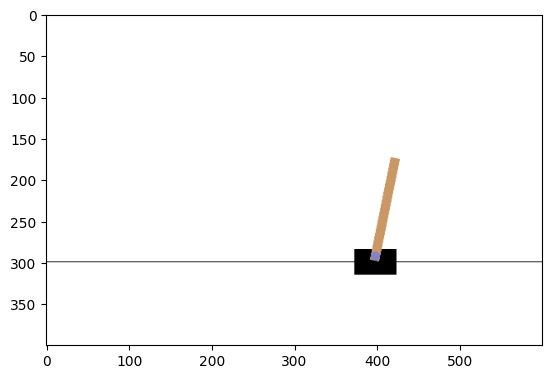

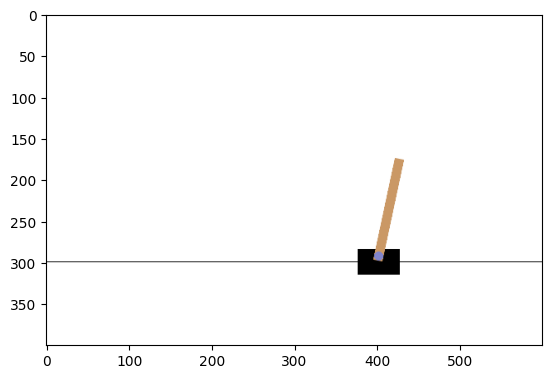

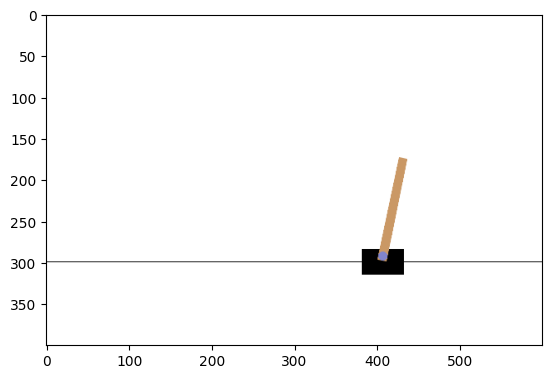

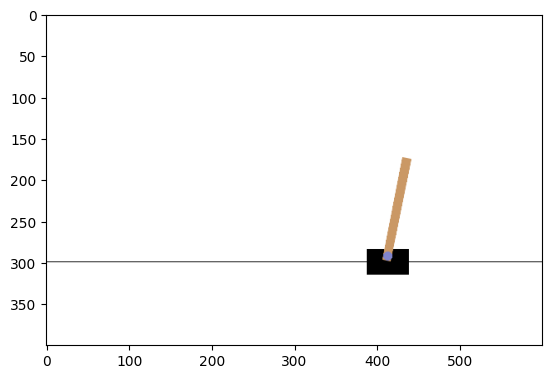

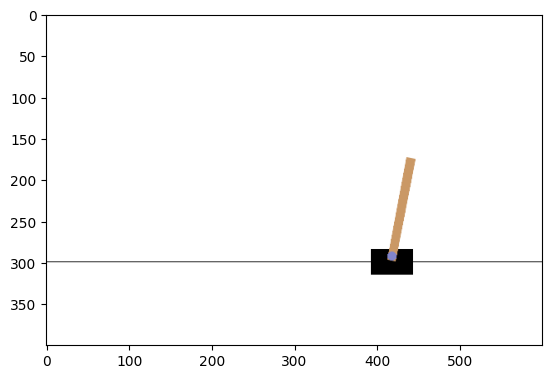

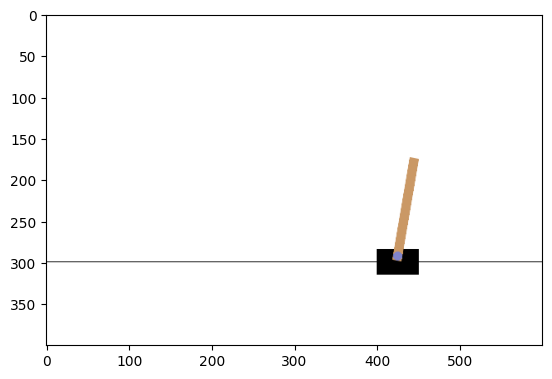

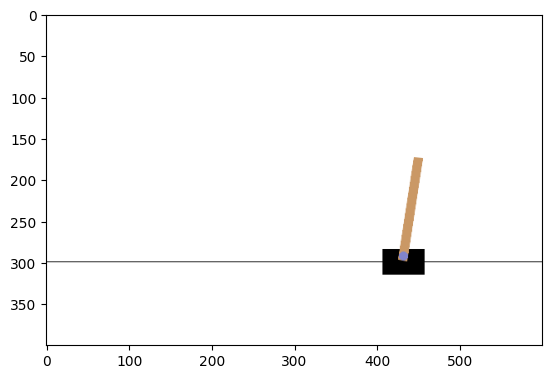

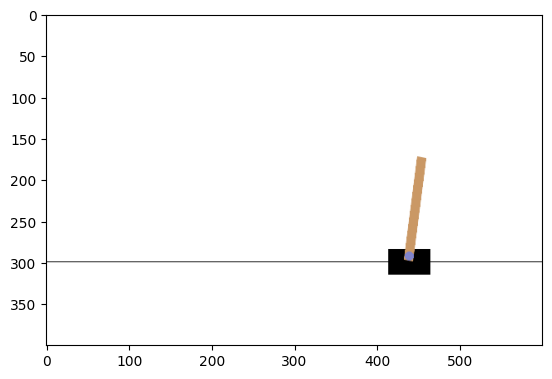

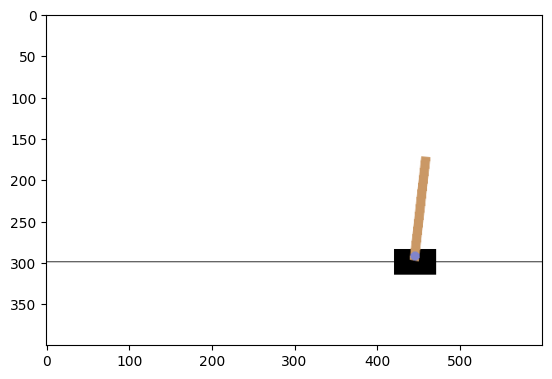

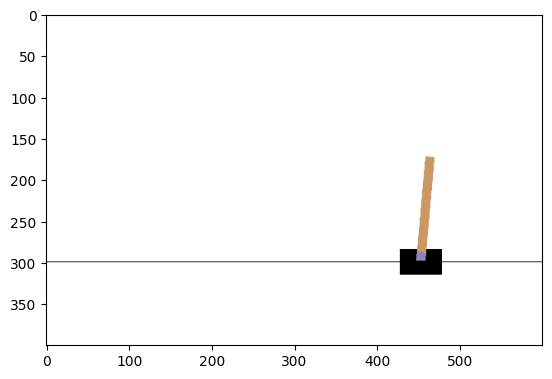

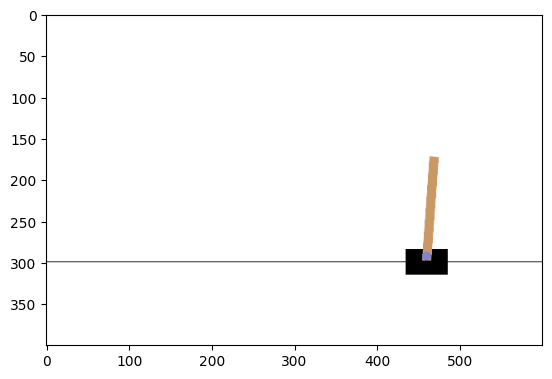

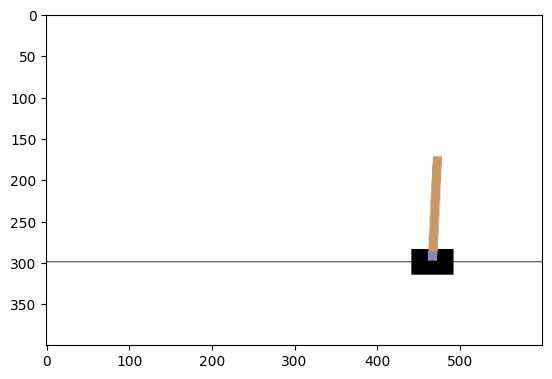

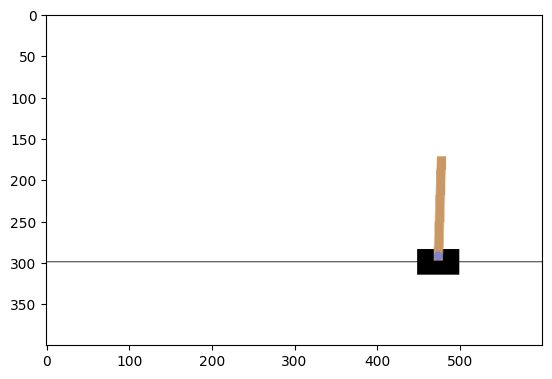

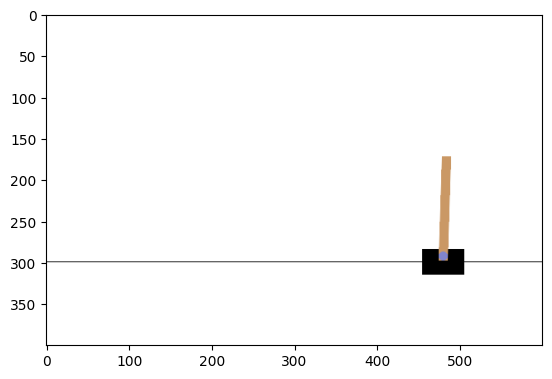

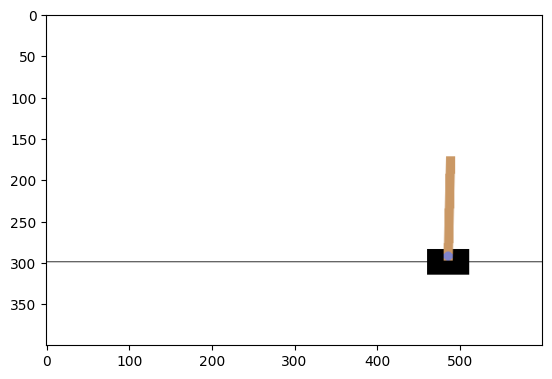

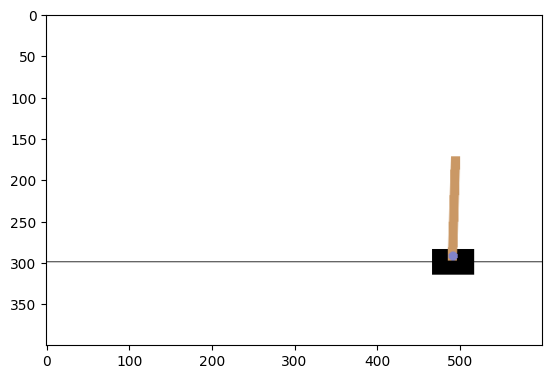

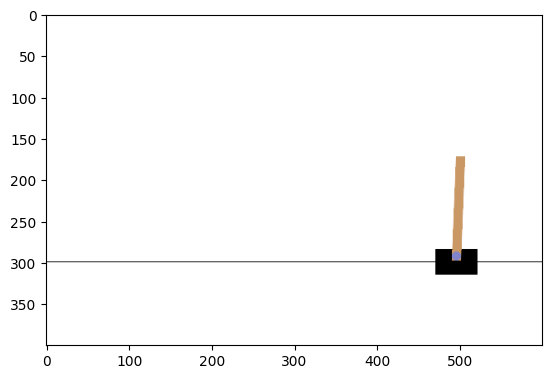

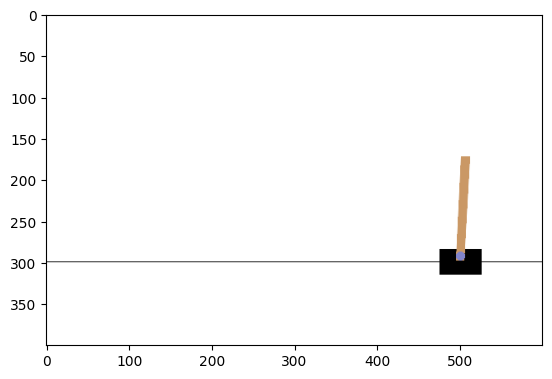

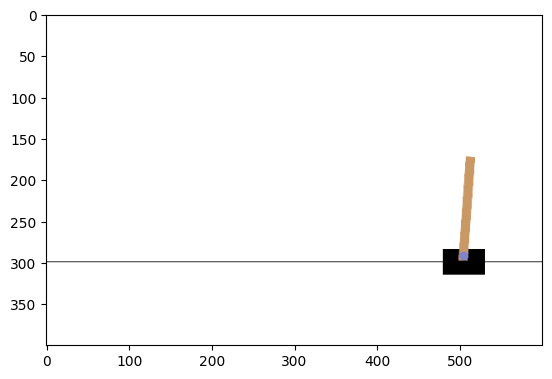

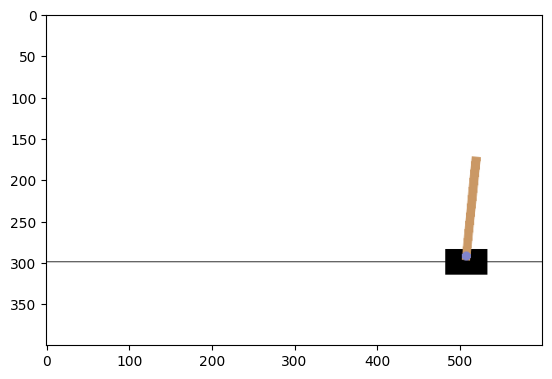

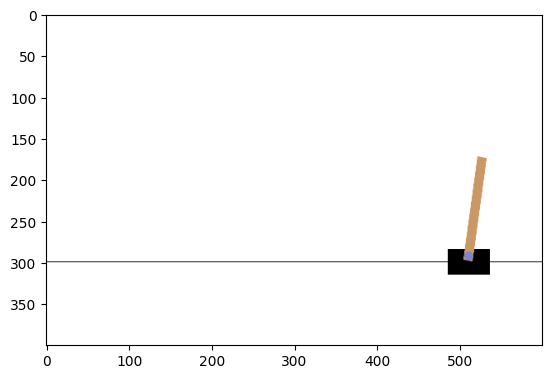

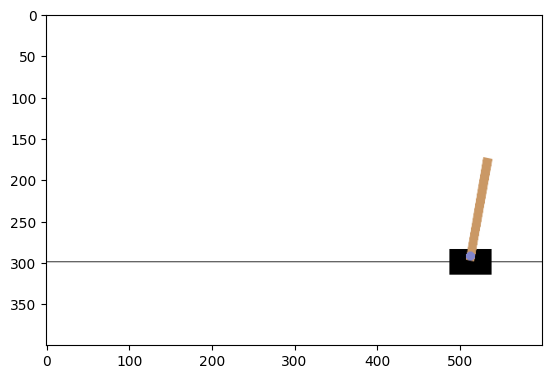

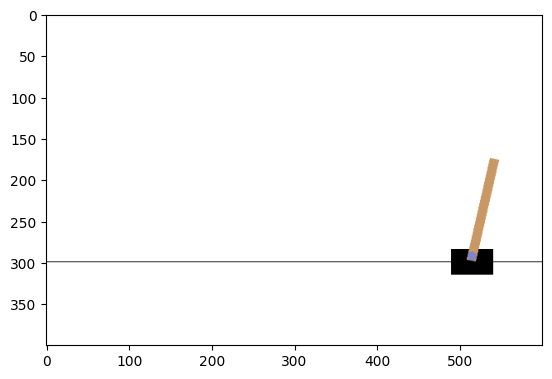

Total reward: 94.0


In [25]:
# 5.1 - Create an environment similar to the training env.
env = gym.make("CartPole-v1", render_mode="rgb_array")
s, _ = env.reset()
done = False
cumulative_reward = 0

while not done:
    # 5.2. Let the agent choose an action;
    a = agent.compute_single_action(observation=s, explore=False)
    # 5.3. and pass it to the environment
    s, r, terminated, truncated, info = env.step(action=a)

    # 5.4. How much reward did you get for that action? Keep the score!
    cumulative_reward += r
    done = terminated or truncated
    # 5.5. Repeat the 5.{2,3, 4} until the end of the episode
    # visualize the agent
    visualize_env(env=env, pause_sec=0.1)
    # continue with the next step without closing the plot

# 5.6. How much total reward you got? What does it mean to have large/small reward?
print("Total reward:", cumulative_reward)